# MOwNiT 
## Laboratorium 5

### Tablice wielowymiarowe i mnożenie macierzy w Julii

In [1]:
# tablice wielowymiarowe w Julii
Asmall = [[1.0 4.0]; [0.0 1.0]]
Bsmall = Asmall
# size(B,1)

2×2 Array{Float64,2}:
 1.0  4.0
 0.0  1.0

#### Wersja naiwna

In [2]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
    C = zeros(Float64, size(A,1), size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [3]:
#kompilacja
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

In [4]:
#kompilacja
@elapsed naive_multiplication(Asmall, Bsmall)

1.844e-6

#### Wersja ulepszona

In [5]:
# Należy pamiętać o "column-major" dostępie do tablic - 
# pierwszy indeks zmienia się szybciej
# tak jak Matlab, R, Fortran 
# inaczej niz C, Python
A1 = [[1 2]; [3 4]]
display(A1)
vec(A1)

2×2 Array{Int64,2}:
 1  2
 3  4

4-element Array{Int64,1}:
 1
 3
 2
 4

In [6]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
# można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication(A, B)
    C = zeros(Float64, size(A,1), size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j] = C[i,j] + A[i,k]*B[k,j]
            end
        end
    end
    C
end

better_multiplication (generic function with 1 method)

In [7]:
@elapsed better_multiplication(Asmall, Bsmall)

0.01313429

#### Wersja BLASowa

In [8]:
#kompilacja funkcji BLASowej do mnożenia macierzy
#https://docs.julialang.org/en/stable/stdlib/linalg/#BLAS-Functions-1
Asmall*Bsmall

2×2 Array{Float64,2}:
 1.0  8.0
 0.0  1.0

#### Porównanie wersji

In [9]:
A = rand(1000, 1000);
B = rand(1000, 1000);

In [10]:
@elapsed naive_multiplication(A, B)

2.512443563

In [11]:
@elapsed better_multiplication(A, B)

1.949072995

In [12]:
@elapsed A*B

0.025962248

### Wielomiany i aproksymacja średniokwadratowa

In [13]:
# pakiet Polynomials jest mozliwy do instalacji pod Juliabox
# https://github.com/JuliaMath/Polynomials.jl
# using Pkg
# Pkg.add("Polynomials")

In [14]:
# Przykładowa funkcja, którą będziemy aproksymować
myfun = exp

exp (generic function with 13 methods)

In [15]:
# aproksymacja sredniokwadratowa wielomianem - tutaj przyklad dla wielomianu 3 stopnia
using Polynomials
# tworzę punkty do aproksymacji (tutaj jako przykład wyliczone wartości funkcji e^x)
xs = 0:10
ys = map(myfun, xs)

# dopasowuje wielomian trzeciego stopnia do danych
fit_poly_3 = fit(xs, ys, 3)

Polynomial(-1086.8658708490236 + 2905.572199468458*x - 1082.745723874463*x^2 + 100.44658880845408*x^3)

In [16]:
typeof(fit_poly_3)

Polynomial{Float64,:x}

In [17]:
# obliczanie wartosci wielomianu 
fit_poly_3(1)

836.4071935534255

In [18]:
Pkg.add("Plots")
using Plots

UndefVarError: [91mUndefVarError: Pkg not defined[39m

In [19]:
plot(fit_poly_3,  extrema(xs)..., label="aproksymacja wielomianem trzeciego stopnia")
# ! -dodanie do tego samego wykresu punktów wg ktorych aproksymowalismy
scatter!(xs, ys, label ="dane punkty")

UndefVarError: [91mUndefVarError: plot not defined[39m

### Wielomiany Czebyszewa w pakiecie Polynomials

In [20]:
# podajemy tablicę współczynników, gdzie wielomiany Czebyszewa są wielomianami bazowymi np dla T2(x)
t2 = ChebyshevT([0, 0, 1])

ChebyshevT(1⋅T_2(x))

In [21]:
plot(t2)

UndefVarError: [91mUndefVarError: plot not defined[39m

In [22]:
#zera wielomianu Czebyszewa T2
Polynomials.roots(t2)

2-element Array{Float64,1}:
 -0.7071067811865475
  0.7071067811865476

In [23]:
# konwersja na wielomian
convert(Polynomial, t2)

Polynomial(-1 + 2*x^2)

In [24]:
# można tworzyć kombinacje liniowe w bazie wielomianów Czebyszewa
kombinacja_T = ChebyshevT([3,2,1])

ChebyshevT(3⋅T_0(x) + 2⋅T_1(x) + 1⋅T_2(x))

In [25]:
convert(Polynomial, kombinacja_T)

Polynomial(2 + 2*x + 2*x^2)

Skąd się wzieło polynomials logo :-)
https://juliamath.github.io/Polynomials.jl/stable/reference/#Example:-The-Polynomials.jl-logo-1

## Aproksymacja jednostajna Taylora i Pade

In [26]:
# using Pkg;
# Pkg.add("TaylorSeries")

In [27]:
using TaylorSeries

In [28]:
# Definiujemy, ile pierwszych wyrazów szeregu Taylora nas interesuje
t = Taylor1(Float64, 5)

 1.0 t + 𝒪(t⁶)

In [29]:
#Rozwinięcie Taylora 
myfun_taylor = myfun(t)

 1.0 + 1.0 t + 0.5 t² + 0.16666666666666666 t³ + 0.041666666666666664 t⁴ + 0.008333333333333333 t⁵ + 𝒪(t⁶)

In [30]:
# Julia hint - jak zapytać o pola typu danych
fieldnames(typeof(myfun_taylor))

(:coeffs, :order)

In [31]:
# mogę wyciągnąć ze struktury typu  odpowiednie pole
myfun_taylor.coeffs

6-element Array{Float64,1}:
 1.0
 1.0
 0.5
 0.16666666666666666
 0.041666666666666664
 0.008333333333333333

In [32]:
# Z przybliżenia Taylora tworzę wielomian zrozumiały dla pakietu Polynomials (typ Polynomial)
myfun_t_pol = Polynomial(myfun_taylor.coeffs)

Polynomial(1.0 + 1.0*x + 0.5*x^2 + 0.16666666666666666*x^3 + 0.041666666666666664*x^4 + 0.008333333333333333*x^5)

In [33]:
# mogę zamienić przybliżenie Taylora na aproksymację Pade (np. dla n=2, m=2)
myfun_pade = Polynomials.PolyCompat.PadeApproximation.Pade(myfun_t_pol, 2, 2)

Polynomials.PolyCompat.PadeApproximation.Pade{Float64,Float64}(Polynomial(1.0 + 0.5000000000000001*x + 0.08333333333333333*x^2), Polynomial(1.0 - 0.5*x + 0.08333333333333333*x^2), :x)

### Zadania
 
1. Uruchomić 
   - `naive_multiplication(A,B)`, 
   - `better_multiplication(A,B)` 
   - mnożenie BLAS w Julii (`A*B`) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów. Wszystkie trzy metody powinny być na jednym wykresie. **(1pkt)**. Do analizy danych można użyć wybranego narzędzia (Julia, R)
 
 
2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną wersję za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1. (osobno niż p.1). **(1 pkt)**
    
    *(Dla chętnych)* sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. 
Do analizy danych można użyć wybranego narzędzia (Julia, R)

3.  Użyć aproksymacji odpowiednimi wielomianami, które najlepiej pasują do zależności czasowych każdego z algorytmów. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianów do wcześniejszych wykresów. **(1 pkt)** Do analizy danych można użyć wybranego narzędzia (Julia, R)

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. **(1 pkt)**

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ **(1 pkt)**


# ZAD1

In [62]:
matrix_size = []
operation_type = []
operation_time = []

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "naive_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed naive_multiplication(A,B))
    end
end

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "better_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed better_multiplication(A,B))
    end
end

for i in 1:10
    for try_id in 1:10
        push!(operation_type, "BLAS_multiplication")
        
        curr_matrix_size = 10 * i
        push!(matrix_size, curr_matrix_size)
        
        A = rand(curr_matrix_size, curr_matrix_size)
        B = rand(curr_matrix_size, curr_matrix_size)
        push!(operation_time, @elapsed A*B)
    end
end

In [63]:
using DataFrames
using Statistics

input_data_frame = DataFrame(Matrix_size = matrix_size,
    Operation_type = operation_type, Operation_time = operation_time)
df_grouped=groupby(input_data_frame, [:Operation_type,:Matrix_size])
df_combined = combine(df_grouped, "Operation_time" => mean, "Operation_time" => std)


,Operation_type,Matrix_size,Operation_time_mean,Operation_time_std
,Any,Any,Float64,Float64
1,naive_multiplication,10,1.6742e-6,5.81671e-7
2,naive_multiplication,20,1.29697e-5,1.61569e-7
3,naive_multiplication,30,4.47084e-5,1.05394e-7
4,naive_multiplication,40,0.000117617,1.16366e-7
5,naive_multiplication,50,0.000247382,3.27398e-6
6,naive_multiplication,60,0.000450253,1.43323e-6
7,naive_multiplication,70,0.000734856,1.90058e-6
8,naive_multiplication,80,0.00112455,6.18478e-6
9,naive_multiplication,90,0.00163412,1.37157e-5


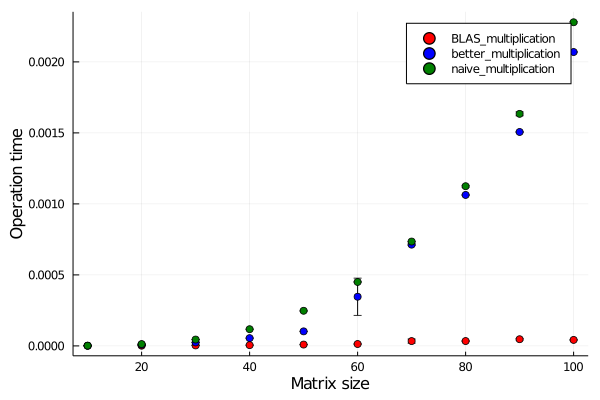

In [69]:
using Plots
scatter(df_combined.Matrix_size, df_combined.Operation_time_mean,
    group=df_combined.Operation_type, yerr=df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time")

# ZAD2


Code in C:

In [37]:
#include <stdio.h>
#include <stdlib.h>
#include <sys/times.h>
#include <unistd.h>
#include <gsl/gsl_blas.h>


clock_t st_time, en_time;
struct tms st_cpu, en_cpu;
char* report_file_name = "c_data.csv";


void save_timer(int matrix_size, char *operation_type, FILE *f){
    int clk_tics = sysconf(_SC_CLK_TCK);
    double real_time = (double)(en_time - st_time) / clk_tics;
    printf("%d,%s,%f\n",
           matrix_size,
           operation_type,
           real_time);
    fprintf(f,"%d,%s,%f\n",
           matrix_size,
           operation_type,
           real_time);
}

void start_timer(){
    st_time = times(&st_cpu);
}

void stop_timer(){
    en_time = times(&en_cpu);
}


void write_report_header(FILE *f){
    fprintf(f, "Matrix_size,Operation_type,Operation_time\n");
    printf( "Matrix_size,Operation_type,Operation_time\n");
}

void naive_multiply(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int j = 0; j < n; ++j)
            for (int k = 0; k < n; ++k)
                C[i][j] += A[i][k]*B[k][j];
}

void better_multiply(double **A, double **B, double **C, int n){
    for (int i = 0; i < n; ++i)
        for (int k = 0; k < n; ++k)
            for (int j = 0; j < n; ++j)
                C[i][j] += A[i][k]*B[k][j];
}

double **create_random_matrix(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double ));
        for (int j = 0; j < n; ++j) {
            A[i][j] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
        }
    }
    return A;
}
double **create_zeroed_matrix(int n){
    double **A = calloc(n, sizeof(double *));
    for (int i = 0; i < n; ++i) {
        A[i] = calloc(n, sizeof(double ));
        for (int j = 0; j < n; ++j) {
            A[i][j] = 0.0;
        }
    }
    return A;
}
void free_matrix(double **A, int n){
    for (int i = 0; i < n; ++i) {
        free(A[i]);
    }
    free(A);
}

int main(){
    FILE* report_file = fopen(report_file_name, "w");
    write_report_header(report_file);
    int strt = 10;
    int end = 1000;
    int stp = 75;

    for(int i = strt; i <= end; i+=stp){
        for(int try_id = 1; try_id<= 10; try_id++){
            int curr_matrix_size = i;
            double **A, **B, **C;
            A = create_random_matrix(curr_matrix_size);
            B = create_random_matrix(curr_matrix_size);
            C = create_zeroed_matrix(curr_matrix_size);

            start_timer();
            naive_multiply(A,B,C,curr_matrix_size);
            stop_timer();
            save_timer(curr_matrix_size, "naive_multiplication", report_file);
        }
    }
    for(int i = strt; i <= end; i+=stp){
        for(int try_id = 1; try_id<= 10; try_id++){
            int curr_matrix_size = i;
            double **A, **B, **C;
            A = create_random_matrix(curr_matrix_size);
            B = create_random_matrix(curr_matrix_size);
            C = create_zeroed_matrix(curr_matrix_size);

            start_timer();
            better_multiply(A,B,C,curr_matrix_size);
            stop_timer();
            save_timer(curr_matrix_size, "better_multiplication", report_file);
        }
    }

    for(int i = strt; i <= end; i+=stp){
        for(int try_id = 1; try_id<= 10; try_id++){
            int curr_matrix_size = i;
            double *A = calloc(curr_matrix_size * curr_matrix_size, sizeof(double));
            double *B = calloc(curr_matrix_size * curr_matrix_size, sizeof(double));
            double *C = calloc(curr_matrix_size * curr_matrix_size, sizeof(double));
            for (int k = 0; k < curr_matrix_size * curr_matrix_size; k++) {
                A[k] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                B[k] = ((double)rand()/(double)(RAND_MAX)) * 5.0;
                C[k] = 0.0;
            }
            gsl_matrix_view A_GSL = gsl_matrix_view_array(A,i,i);
            gsl_matrix_view B_GSL = gsl_matrix_view_array(B,i,i);
            gsl_matrix_view C_GSL = gsl_matrix_view_array(C,i,i);
            start_timer();
            gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                            1.0, &A_GSL.matrix, &B_GSL.matrix,
                            0.0, &C_GSL.matrix);
            stop_timer();
            save_timer(curr_matrix_size, "BLAS_multiplication", report_file);
            free(A);
            free(B);
            free(C);
        }
    }
}

LoadError: [91msyntax: extra token "st_time" after end of expression[39m

In [65]:
import Pkg
Pkg.add("CSV")
using CSV

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [66]:
C_input_data_frame = CSV.read("./CPart/c_data.csv", delim=",",DataFrame)
C_df_grouped=groupby(C_input_data_frame, [:Operation_type,:Matrix_size])
C_df_combined = combine(C_df_grouped, "Operation_time" => mean, "Operation_time" => std)

,Operation_type,Matrix_size,Operation_time_mean,Operation_time_std
,String31,Int64,Float64,Float64
1,naive_multiplication,10,0.0,0.0
2,naive_multiplication,85,0.004,0.00516398
3,naive_multiplication,160,0.016,0.00516398
4,naive_multiplication,235,0.055,0.00527046
5,naive_multiplication,310,0.122,0.00632456
6,naive_multiplication,385,0.24,0.00666667
7,naive_multiplication,460,0.405,0.0108012
8,naive_multiplication,535,0.642,0.0248551
9,naive_multiplication,610,0.945,0.0279881


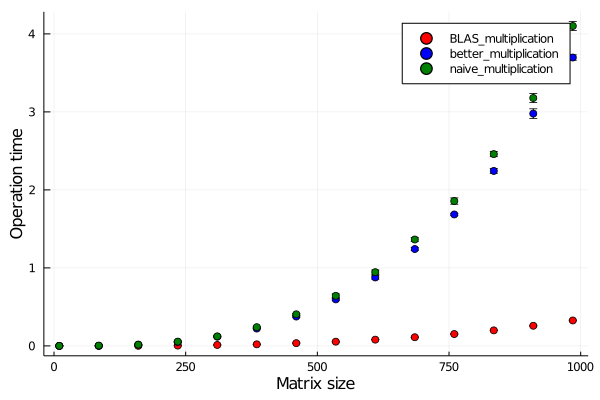

In [68]:
scatter(C_df_combined.Matrix_size, C_df_combined.Operation_time_mean,
    group=C_df_combined.Operation_type, yerr=C_df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time")


# ZAD3

Julia multiplications:

In [102]:
using Polynomials
using Plots

In [108]:
x_julia = df_combined[df_combined[:,1] .== "naive_multiplication", 2]
x_julia = Vector{Int64}(vec(x_julia))
y_julia_naive = df_combined[df_combined[:,1] .== "naive_multiplication", 3]
y_julia_naive = Vector{Float64}(vec(y_julia_naive))
y_julia_better = df_combined[df_combined[:,1] .== "better_multiplication", 3]
y_julia_better = Vector{Float64}(vec(y_julia_better))
y_julia_BLAS = df_combined[df_combined[:,1] .== "BLAS_multiplication", 3]
y_julia_BLAS = Vector{Float64}(vec(y_julia_BLAS))


fit_poly_julia_naive = fit(x_julia, y_julia_naive, 3)
fit_poly_julia_better = fit(x_julia, y_julia_better, 3)
fit_poly_julia_BLAS = fit(x_julia, y_julia_BLAS, 3)

Polynomial(1.2904756666666716e-5 - 1.2780619677544682e-6*x + 3.4104481351981335e-8*x^2 - 1.8109127816627798e-10*x^3)

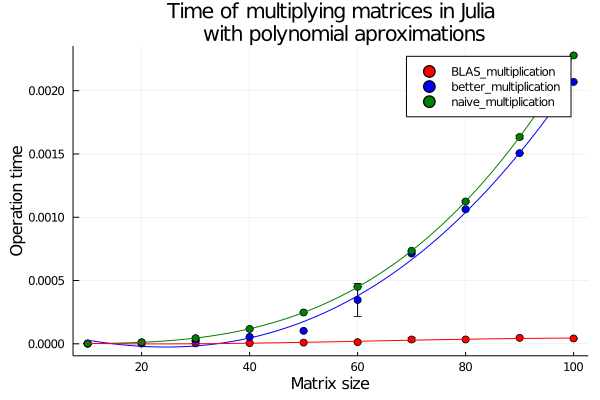

In [109]:
scatter(df_combined.Matrix_size, df_combined.Operation_time_mean,
    group=df_combined.Operation_type, yerr=df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time",
    title = "Time of multiplying matrices in Julia
    with polynomial aproximations")

plot!(fit_poly_julia_naive,  
    extrema(x_julia)..., 
    label = "",
    color = "green"
)
plot!(fit_poly_julia_better,  
    extrema(x_julia)..., 
    label = "",
    color = "blue"
)
plot!(fit_poly_julia_BLAS,  
    extrema(x_julia)..., 
    label = "",
    color = "red"
)

C multiplications:


In [111]:
x_C = C_df_combined[C_df_combined[:,1] .== "naive_multiplication", 2]
x_C = Vector{Int64}(vec(x_C))
y_C_naive = C_df_combined[C_df_combined[:,1] .== "naive_multiplication", 3]
y_C_naive = Vector{Float64}(vec(y_C_naive))
y_C_better = C_df_combined[C_df_combined[:,1] .== "better_multiplication", 3]
y_C_better = Vector{Float64}(vec(y_C_better))
y_C_BLAS = C_df_combined[C_df_combined[:,1] .== "BLAS_multiplication", 3]
y_C_BLAS = Vector{Float64}(vec(y_C_BLAS))



fit_poly_C_naive = fit(x_C, y_C_naive, 3)
fit_poly_C_better = fit(x_C, y_C_better, 3)
fit_poly_C_BLAS = fit(x_C, y_C_BLAS, 3)

Polynomial(-0.000294536028967341 - 1.501444089683718e-7*x + 1.594684182919552e-8*x^2 + 3.2514181533789345e-10*x^3)

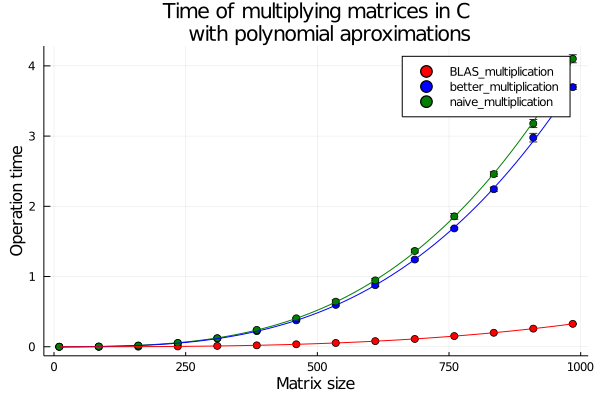

In [112]:
scatter(C_df_combined.Matrix_size, C_df_combined.Operation_time_mean,
    group=C_df_combined.Operation_type, yerr=C_df_combined.Operation_time_std,
    colour = [:red :blue :green], xlabel="Matrix size", ylabel="Operation time",
    title = "Time of multiplying matrices in C
    with polynomial aproximations")

plot!(fit_poly_C_naive,  
    extrema(x_C)..., 
    label = "",
    color = "green"
)
plot!(fit_poly_C_better,  
    extrema(x_C)..., 
    label = "",
    color = "blue"
)
plot!(fit_poly_C_BLAS,  
    extrema(x_C)..., 
    label = "",
    color = "red"
)

# ZAD4

In [175]:
xs = -10:1:10
f(x) = 1/(2x^2 + 3)
print(xs[21])

10

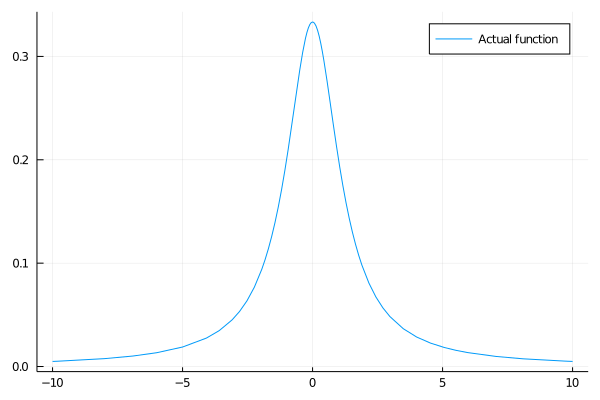

In [185]:
plot(f, extrema(xs)..., label="Actual function")

In [180]:
ys = map(x -> f(x), xs)
print(ys)
polynomial = fit(xs, ys, 15)

[0.0049261083743842365, 0.006060606060606061, 0.007633587786259542, 0.009900990099009901, 0.013333333333333334, 0.018867924528301886, 0.02857142857142857, 0.047619047619047616, 0.09090909090909091, 0.2, 0.3333333333333333, 0.2, 0.09090909090909091, 0.047619047619047616, 0.02857142857142857, 0.018867924528301886, 0.013333333333333334, 0.009900990099009901, 0.007633587786259542, 0.006060606060606061, 0.0049261083743842365]

Polynomial(0.29076905799549607 - 4.346369801912999e-14*x - 0.07351319792734859*x^2 + 2.209020919261048e-14*x^3 + 0.007742501360698931*x^4 - 3.094894882727131e-15*x^5 - 0.0003943690407554867*x^6 + 1.8804894900240764e-16*x^7 + 1.06120461478057e-5*x^8 - 5.597027319919753e-18*x^9 - 1.5404585027320647e-7*x^10 + 8.555533188213186e-20*x^11 + 1.1368569049611625e-9*x^12 - 6.448952179904314e-22*x^13 - 3.3359354552791816e-12*x^14 + 1.89766533467481e-24*x^15)

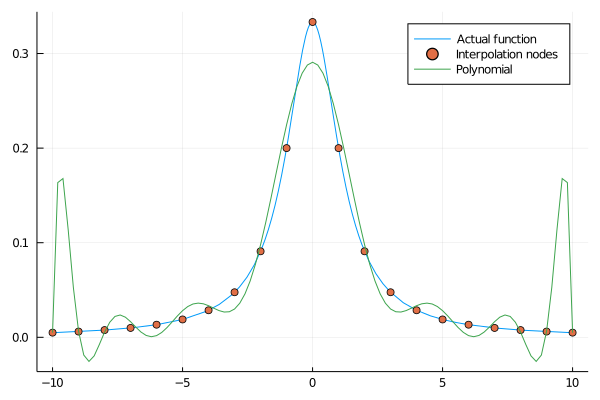

In [186]:
scatter!(xs, ys, label = "Interpolation nodes")
plot!(polynomial, extrema(xs)..., label = "Polynomial")

In [182]:
chebyshev_base = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
chebyshev_polynomial = ChebyshevT(chebyshev_base)
chebyshev_polynomial_roots = 10 * Polynomials.roots(chebyshev_polynomial)
chebyshev_based_ys = map(x -> f(x), chebyshev_polynomial_roots)
chebyshev_based_polynomial = fit(chebyshev_polynomial_roots, chebyshev_based_ys,15)

Polynomial(0.29237240834415207 - 6.34287386814578e-14*x - 0.06775109312370861*x^2 + 2.7991904853067282e-14*x^3 + 0.0062564570452313195*x^4 - 3.240592271574332e-15*x^5 - 0.00027687832529966556*x^6 + 1.6802106389412134e-16*x^7 + 6.492746139012116e-6*x^8 - 4.5583798550017066e-18*x^9 - 8.277400496324007e-8*x^10 + 6.630092836367711e-20*x^11 + 5.4183595831834e-10*x^12 - 4.8554679393645105e-22*x^13 - 1.4257707300331435e-12*x^14 + 1.3994513263587043e-24*x^15)

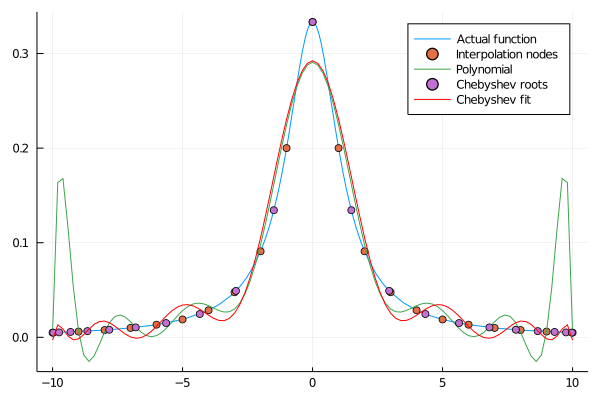

In [187]:
scatter!(chebyshev_polynomial_roots, chebyshev_based_ys, label = "Chebyshev roots")
plot!(chebyshev_based_polynomial, extrema(xs)..., label = "Chebyshev fit", color="red")

# ZAD5

In [190]:
f(x) = log(x+1)/x
taylor_polynomial_base = f(t)
taylor_polynomial = Polynomial(taylor_polynomial_base.coeffs)

Polynomial(1.0 - 0.5*x + 0.3333333333333333*x^2 - 0.25*x^3 + 0.2*x^4)

In [193]:
pade_object = Polynomials.PolyCompat.PadeApproximation.Pade(taylor_polynomial, 2, 2)
pade_approx(x) = pade_object.p(x) / pade_object.q(x)

pade_approx (generic function with 1 method)

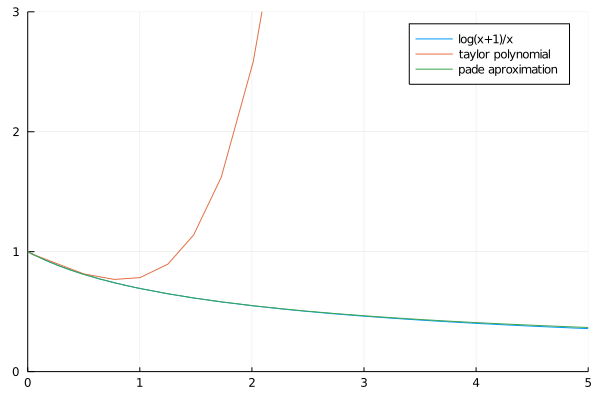

In [202]:
plot(f,
    ylims = (0,3),
    xlims = (0,5),
    label="log(x+1)/x")
plot!(taylor_polynomial,
    ylims = (0,3),
    xlims = (0,5),
    label="taylor polynomial")
plot!(pade_approx,
    ylims = (0,3),
    xlims = (0,5),
    label="pade aproximation")

